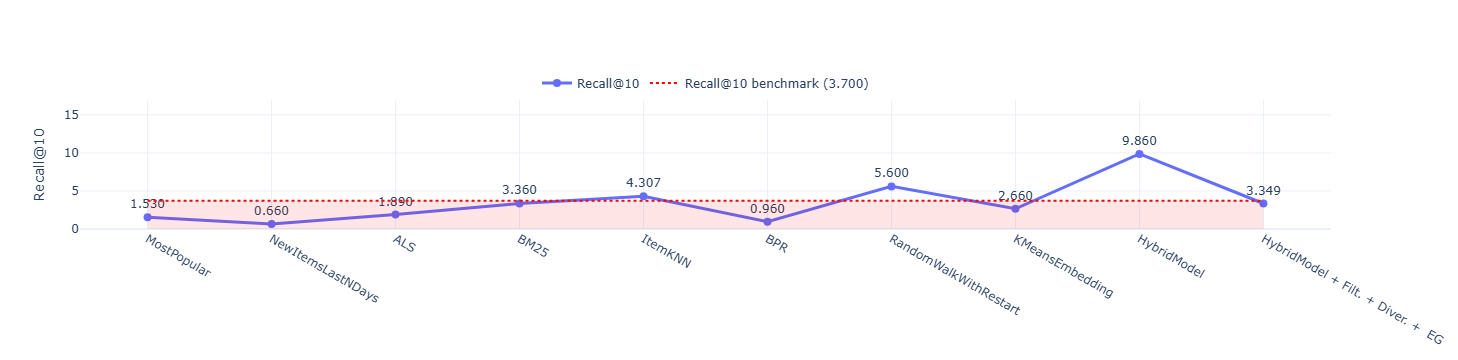

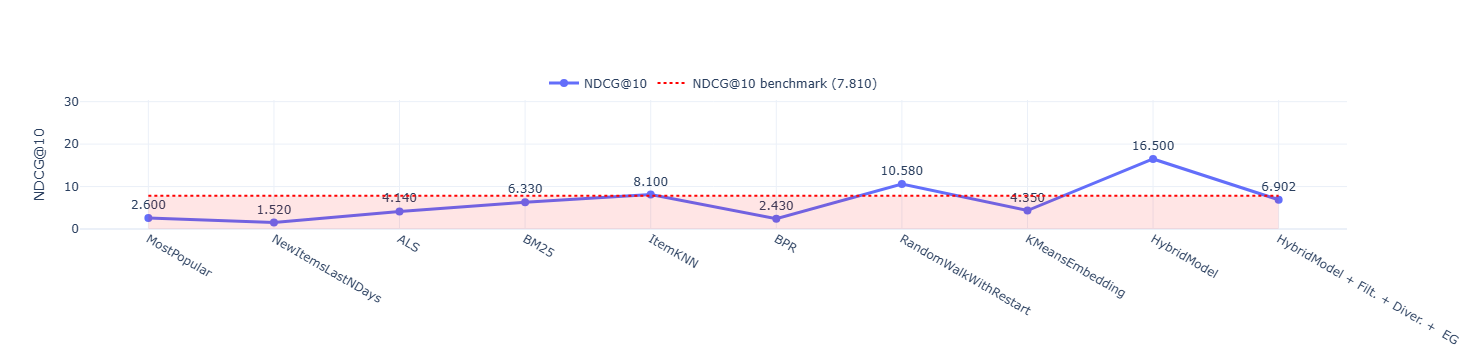

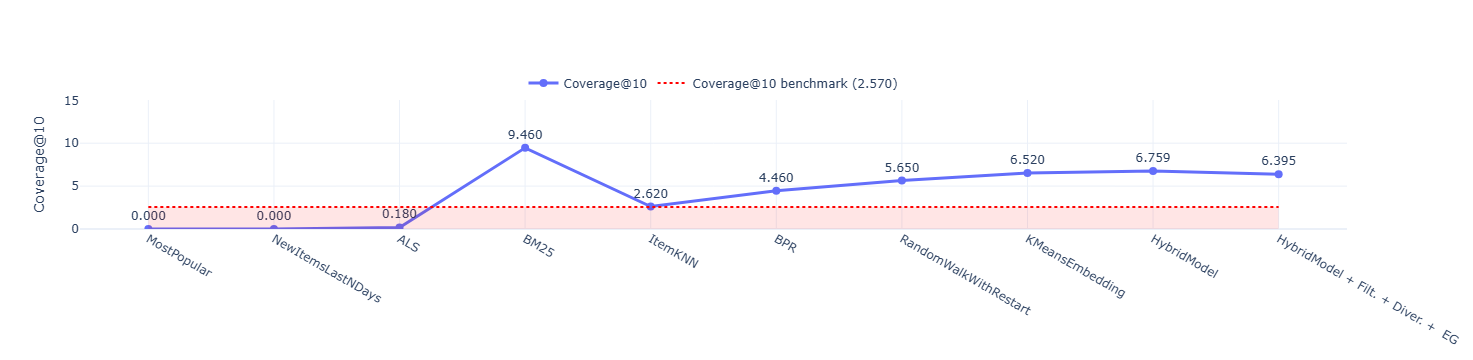

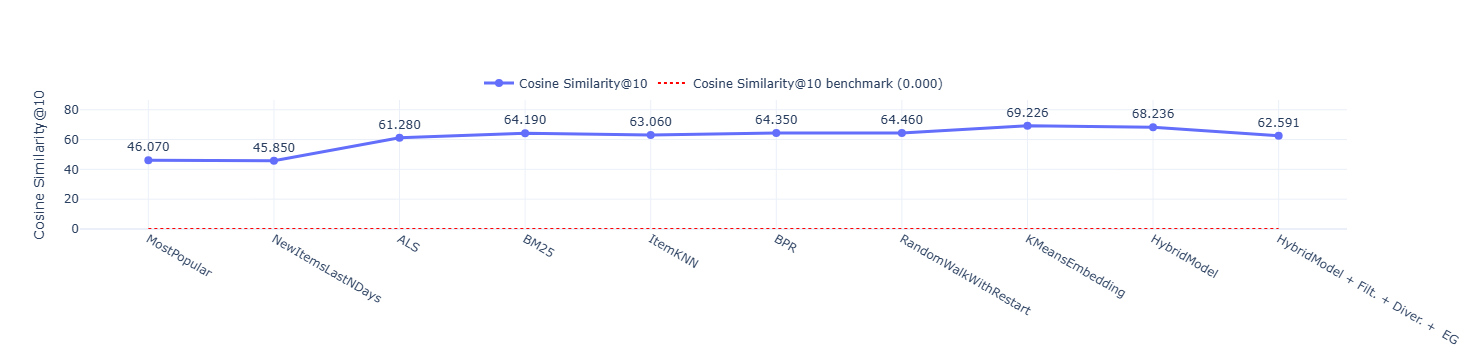

In [2]:
import plotly.graph_objects as go
import numpy as np


def plot_metric_with_benchmark(
    metric_name: str,
    metric_values: list[float],
    experiment_names: list[str],
    benchmark_value: float | None = None,
    dashed: bool = False,
    fill_color: str = "rgba(255, 0, 0, 0.1)"  # красный с прозрачностью
):
    """
    Рисует график метрики по экспериментам + горизонтальную линию-бенчмарк
    + подсветку (заливку) до линии бенчмарка.
    """

    if len(metric_values) != len(experiment_names):
        raise ValueError("Длины metric_values и experiment_names должны совпадать")

    fig = go.Figure()

    # === Основная линия метрики ===
    fig.add_trace(go.Scatter(
        x=experiment_names,
        y=metric_values,
        mode="lines+markers+text",
        name=metric_name,
        text=[f"{v:.3f}" for v in metric_values],
        textposition="top center",
        line=dict(width=3, dash="dash" if dashed else "solid"),
        marker=dict(size=8)
    ))

    # === Горизонтальная линия-бенчмарк ===
    if benchmark_value is not None:
        # Заливка до бенчмарка
        fig.add_trace(go.Scatter(
            x=[experiment_names[0], experiment_names[-1], experiment_names[-1], experiment_names[0]],
            y=[0, 0, benchmark_value, benchmark_value],
            fill="toself",
            fillcolor=fill_color,
            line=dict(color="rgba(255,0,0,0)"),  # без контура
            hoverinfo="skip",
            showlegend=False
        ))

        # Линия-бенчмарк
        fig.add_trace(go.Scatter(
            x=[experiment_names[0], experiment_names[-1]],
            y=[benchmark_value, benchmark_value],
            mode="lines",
            name=f"{metric_name} benchmark ({benchmark_value:.3f})",
            line=dict(width=2, dash="dot", color="red")
        ))

    # === Настройки осей и оформления ===
    y_max = max(metric_values + ([benchmark_value] if benchmark_value else [0])) * 1.25

    fig.update_layout(
        yaxis_title=metric_name,
        yaxis=dict(range=[0, y_max]),
        template="plotly_white",
        hovermode="x unified",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )

    return fig




experiments = [
    "MostPopular",
    "NewItemsLastNDays",
    "ALS", 
    "BM25",
    "ItemKNN",
    "BPR",
    "RandomWalkWithRestart",
    "KMeansEmbedding",
    "HybridModel",
    "HybridModel + Filt. + Diver. +  EG",
    
]

recall_scores = np.array([0.0153, 0.0066,  0.0189,  0.0336, 0.04307, 0.0096, 0.0560, 0.0266, 0.0986, 0.03349 ])*100
ndcg_scores   = np.array([0.0260, 0.0152,  0.0414,  0.0633, 0.0810, 0.0243, 0.1058, 0.0435, 0.1650, 0.06902])*100
coverage_scores   = np.array([0.0000, 0.0000,  0.0018, 0.0946, 0.0262, 0.0446, 0.0565, 0.0652, 0.06759, 0.06395])*100
cosine_similarity_scores   = np.array([0.4607, 0.4585,  0.6128,  0.6419, 0.6306, 0.6435, 0.6446, 0.69226, 0.68236, 0.62591])*100


# 1) график Recall@10
fig_recall = plot_metric_with_benchmark(
    "Recall@10", recall_scores, experiments,
    benchmark_value=0.037*100,    # максимум авторов по Recall
    dashed=False
)
fig_recall.show()

# 2) график NDCG@10
fig_ndcg = plot_metric_with_benchmark(
    "NDCG@10", ndcg_scores, experiments,
    benchmark_value=0.0781*100,    # максимум авторов по NDCG
    dashed=False              # отличим стиль линий, если хочешь
)
fig_ndcg.show()

# 3) график Coverage@10
fig_coverage = plot_metric_with_benchmark(
    "Coverage@10", coverage_scores, experiments,
    benchmark_value=0.0257*100,    # максимум авторов по Coverage
    dashed=False              
)
fig_coverage.show()


# 4) график Cosine Similarity@10
fig_cosine_similarity = plot_metric_with_benchmark(
    "Cosine Similarity@10", cosine_similarity_scores, experiments,
    benchmark_value=0.0000*100,    # максимум авторов по Coverage
    dashed=False              
)
fig_cosine_similarity.show()
